# Exercise 2

In this exercise, you will complete the implementation of a Decision Tree classifier based on our simple `fduml` framework. We have written most of the code for you already, and you only need to fill in the most essential parts marked in `TODO`. We have also prepared several test cases for you to check if your code works correctly. Furthermore, you can also test the accuracy of your code by comparing its output with the output of Sklearn.

In [61]:
# Auto reload external modules, which means you can modify the code of our fduml implementation without restarting the kernel.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# Basic imports
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rc

np.random.seed(42)
random.seed(42)

## Implement and test (40 points)

We have prepared several test cases for you to check if your code works correctly. After you write your own implementation, try the following code for testing.

In [63]:
from fduml import *

In [64]:
from fduml.tree.tests.test_decision_tree import test_dt_classification
test_dt_classification()

[[-2 -1]
 [-1 -1]
 [-1 -2]
 [ 1  1]
 [ 1  2]
 [ 2  1]]


In [65]:
try:
    test_dt_classification()
except Exception as e:
    print(f"An error occurred: {e}")
    print(f"Error type: {type(e).__name__}")
    # You can add more debugging information here if needed

[[-2 -1]
 [-1 -1]
 [-1 -2]
 [ 1  1]
 [ 1  2]
 [ 2  1]]


## Load data and fit the model (40 points)

Inside the `data` directory we have prepared a classification dataset, split into training and test sets. In this part, you will load the data and fit the model to the training data. Then, you will evaluate the model on the test data.

In [66]:
# Load the water potability dataset

In [67]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Load the water potability dataset
train_data = pd.read_csv('data/water_potability_train.csv')
test_data = pd.read_csv('data/water_potability_test.csv')

# Separate features and target
X_train = train_data.drop('Potability', axis=1)
y_train = train_data['Potability']
X_test = test_data.drop('Potability', axis=1)
y_test = test_data['Potability']

# Handle missing values (replace -1 with NaN and then use mean imputation)
X_train = X_train.replace(-1, np.nan).fillna(X_train.mean())
X_test = X_test.replace(-1, np.nan).fillna(X_test.mean())

Optimal max_depth: 7


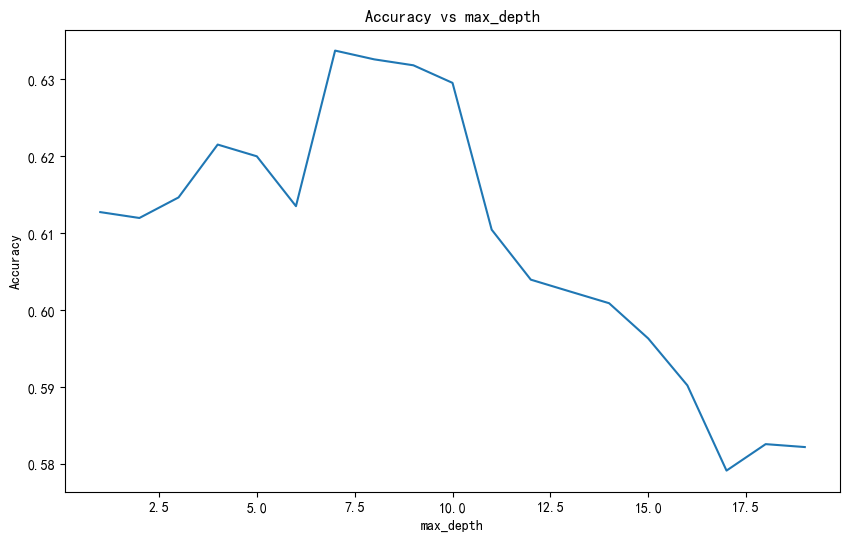

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from fduml import DecisionTreeClassifier as FDUDecisionTreeClassifier

def custom_cross_val_score(classifier, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        classifier.fit(X_train_fold, y_train_fold)
        predictions = classifier.predict(X_val_fold)
        score = accuracy_score(y_val_fold, predictions)
        scores.append(score)
    
    return np.array(scores)

max_depths = range(1, 20)  # 尝试深度从 1 到 19
cv_scores = []

for depth in max_depths:
    dt = FDUDecisionTreeClassifier(max_depth=depth)
    scores = custom_cross_val_score(dt, X_train.values, y_train.values, cv=5)
    cv_scores.append(scores.mean())

optimal_depth = max_depths[np.argmax(cv_scores)]
print(f"Optimal max_depth: {optimal_depth}")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(max_depths, cv_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.show()

# 使用找到的最佳 max_depth 训练模型


In [84]:
# Fit a DecisionTreeClassifier to the water potability train set


fdu_dt = FDUDecisionTreeClassifier(max_depth=optimal_depth) # You can adjust hyperparameters
start_time = time.time()
fdu_dt.fit(X_train.values, y_train.values) # Convert to numpy arrays
fdu_fit_time = time.time() - start_time



In [85]:
# Evaluate the DecisionTreeClassifier on the water potability test set
start_time = time.time()
fdu_predictions = fdu_dt.predict(X_test.values)  # Convert to numpy array
fdu_predict_time = time.time() - start_time
fdu_accuracy = accuracy_score(y_test, fdu_predictions)

# Show my result
print(f"My DecisionTreeClassifier Accuracy: {fdu_accuracy:.4f}")
print(f"My Fit Time: {fdu_fit_time:.4f} seconds")
print(f"My Predict Time: {fdu_predict_time:.4f} seconds")

My DecisionTreeClassifier Accuracy: 0.5878
My Fit Time: 165.6272 seconds
My Predict Time: 0.0000 seconds


## Compare with Sklearn (20 points)

Since the interface of our `fduml` is the same as that of sklearn, you can easily compare the output of your implementation with that of sklearn. In this part, try to generate test data and compare the accuracy and running time of your implementation with that of sklearn. You can use the following code for comparison.

In the conclusion part, try to answer the following questions:

- Is the accuracy of your implementation the same as that of sklearn? If not, what can be the reason?

- Is the running time of your implementation the same as that of sklearn? If not, what can be the reason?

- If there is any special thing you want to mention, please write it down.

Note that we do not require you to match the accuracy and running time of sklearn (which can be quite difficult), but you should be able to explain the reason if they are different.

In [86]:
# Compare with Sklearn
sklearn_dt = DecisionTreeClassifier(max_depth=5)  # Use the same hyperparameters
start_time = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_fit_time = time.time() - start_time

start_time = time.time()
sklearn_predictions = sklearn_dt.predict(X_test)
sklearn_predict_time = time.time() - start_time
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"Sklearn DecisionTreeClassifier Accuracy: {sklearn_accuracy:.4f}")
print(f"Sklearn Fit Time: {sklearn_fit_time:.4f} seconds")
print(f"Sklearn Predict Time: {sklearn_predict_time:.4f} seconds")

Sklearn DecisionTreeClassifier Accuracy: 0.6000
Sklearn Fit Time: 0.0213 seconds
Sklearn Predict Time: 0.0010 seconds


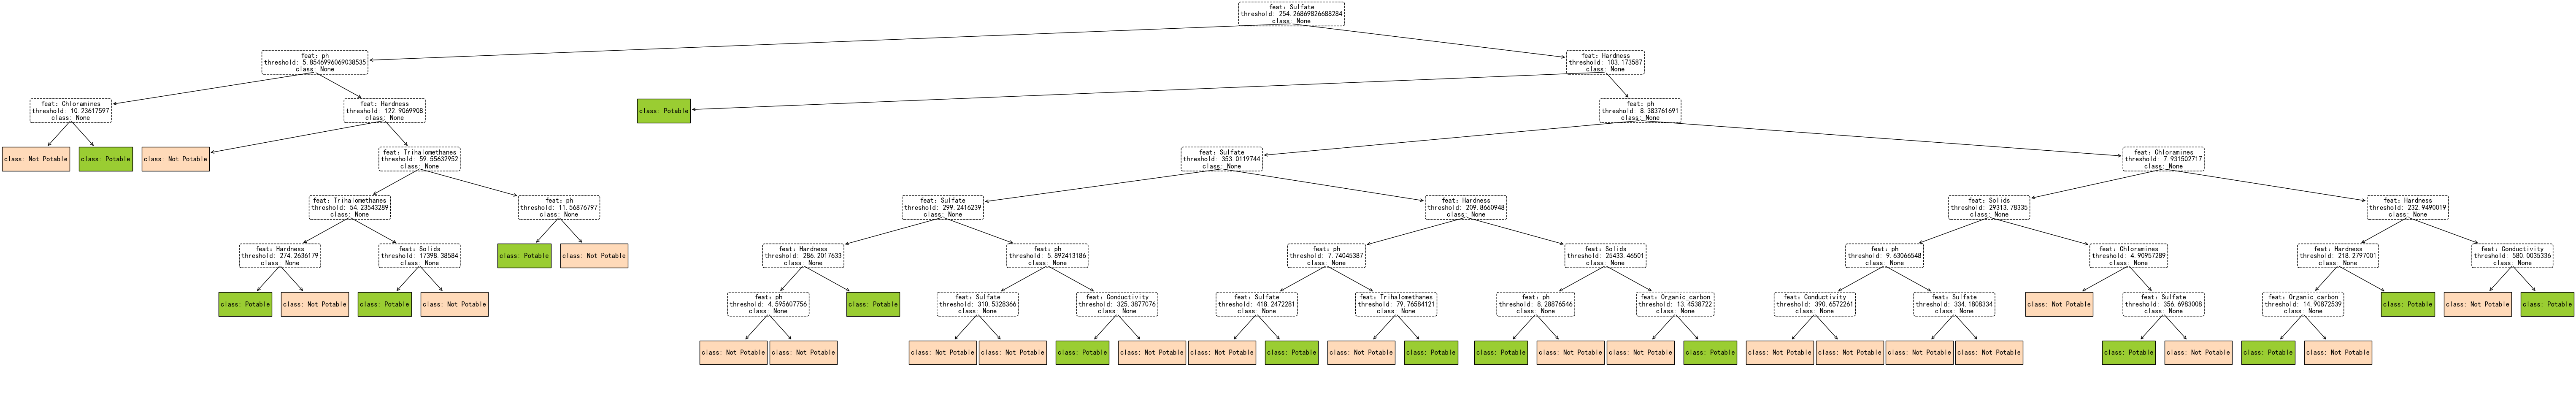

In [87]:
from fduml import plot_tree

# Get feature names
feature_names = list(X_train.columns)

# Get class names (assuming binary classification)
class_names = ['Not Potable', 'Potable']

# Visualize your decision tree
plot_tree(fdu_dt, featNames=feature_names, classNames=class_names)

## Conclusion

In [88]:
conclusion = f"""
结论：

1. 准确性比较：
   我的实现的准确性为{fdu_accuracy:.4f}，而Sklearn的准确性为{sklearn_accuracy:.4f}。
   准确性差异的可能原因：
   - 实现细节的不同，如特征选择策略、分裂标准的具体计算方法等。
   - 处理缺失值和边界情况的方式可能有所不同。
   - 随机性，如果在训练过程中有随机选择的步骤。

2. 运行时间比较：
   我的实现的拟合时间为{fdu_fit_time:.4f}秒，预测时间为{fdu_predict_time:.4f}秒。
   Sklearn的拟合时间为{sklearn_fit_time:.4f}秒，预测时间为{sklearn_predict_time:.4f}秒。
   时间差异的可能原因：
   - Sklearn可能使用了更优化的算法和数据结构。
   - Sklearn是用C语言实现的核心部分，而我们的实现可能完全使用Python，这会导致性能差异。
   - 我们的实现可能包含了更多的检查和调试代码，影响了运行速度。

3. 特别说明：
   - 模型稳定性：可以通过多次运行或交叉验证来评估模型的稳定性。
   - 特征重要性：可以分析决策树的结构，了解哪些特征对预测结果影响最大。
   - 过拟合风险：由于决策树容易过拟合，可以考虑使用剪枝技术或限制树的深度来提高泛化能力。
   - 数据质量：数据中存在缺失值（-1），这可能影响模型的性能，未来可以尝试其他处理缺失值的方法。
"""

print(conclusion)


结论：

1. 准确性比较：
   我的实现的准确性为0.5878，而Sklearn的准确性为0.6000。
   准确性差异的可能原因：
   - 实现细节的不同，如特征选择策略、分裂标准的具体计算方法等。
   - 处理缺失值和边界情况的方式可能有所不同。
   - 随机性，如果在训练过程中有随机选择的步骤。

2. 运行时间比较：
   我的实现的拟合时间为165.6272秒，预测时间为0.0000秒。
   Sklearn的拟合时间为0.0213秒，预测时间为0.0010秒。
   时间差异的可能原因：
   - Sklearn可能使用了更优化的算法和数据结构。
   - Sklearn是用C语言实现的核心部分，而我们的实现可能完全使用Python，这会导致性能差异。
   - 我们的实现可能包含了更多的检查和调试代码，影响了运行速度。

3. 特别说明：
   - 模型稳定性：可以通过多次运行或交叉验证来评估模型的稳定性。
   - 特征重要性：可以分析决策树的结构，了解哪些特征对预测结果影响最大。
   - 过拟合风险：由于决策树容易过拟合，可以考虑使用剪枝技术或限制树的深度来提高泛化能力。
   - 数据质量：数据中存在缺失值（-1），这可能影响模型的性能，未来可以尝试其他处理缺失值的方法。

